In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset,random_split
from torch.optim.lr_scheduler import ExponentialLR, CosineAnnealingWarmRestarts,PolynomialLR
from torchvision import transforms, models 
from Data_loader import CustomDataset
from Model import Mobile_Net
import warnings
warnings.filterwarnings("ignore") 
from Chekpoint import Checkpoint
from torchvision import models
from torchsummary import summary   
import cv2   

c:\Users\Ali\Desktop\DIG\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
chk = Checkpoint()


In [14]:
loaded_model = torch.load('net.pth') 

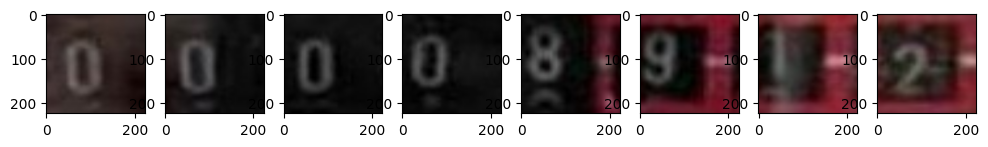

In [159]:
def show_images(images):
    plt.figure(figsize=(12, 6))
    for i in range(8):
        plt.subplot(1, 8, i + 1)
        img = np.transpose(sub_images[i].numpy(), (1, 2, 0))
        plt.imshow(img)
    plt.show()

# Display the batch of images

show_images(sub_images)

In [23]:
import PIL

In [30]:
p = r'C:\Users\Ali\Desktop\DIG\denoise\de.png'
img_p = cv2.imread(p)

img_p = PIL.Image.fromarray(img_p)
#img = Image.open(p).convert('RGB')
transform = transforms.Compose([
    
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
img = transform(img_p)

img

#out = loaded_model(img)
#_,pred = torch.max(out.data,1)
#pred 


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.5294, 0.5294, 0.5373],
         [0.0000, 0.0000, 0.0000,  ..., 0.5294, 0.5373, 0.5373],
         [0.0000, 0.0000, 0.0000,  ..., 0.5373, 0.5373, 0.5490]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.6353, 0.6353, 0.6353],
         [1.0000, 1.0000, 1.0000,  ..., 0.6353, 0.6431, 0.6431],
         [1.0000, 1.0000, 1.0000,  ..., 0.6431, 0.6431, 0.6471]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

In [184]:
def predicted(img):
    out = loaded_model(img)
    _,pred = torch.max(out.data,1)
    return pred 



img_path = r'C:\Users\Ali\Desktop\DIG\khak\noise\piece_split0_bsplit_0.13749223947525024.png'
img1 = Image.open(img_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
]) 
img = transform(img1) 
predicted(img.unsqueeze(0))

tensor([2])

In [58]:
class CustomDataset(Dataset):
    def __init__(self, transform):
        self.root = r'C:\Users\Ali\Desktop\DIG\khak\noise'
        self.transform = transform   
        self.images = self.load_images()

    def load_images(self):
        images = []
        for file_name in os.listdir(self.root):
                if file_name != 'Thumbs.ini':
                    file_path = os.path.join(self.root, file_name)
                    images.append((file_path))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img_path = self.images[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        return img
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])      

imgs2 = CustomDataset(transform=transform) 
data_loader2 = torch.utils.data.DataLoader(imgs2, batch_size=30, shuffle=True) 




In [59]:
data_noise = next(iter(data_loader2))
#data_org  = next(iter(data_loader1)) 


In [60]:
def predict(img):
     
     out = loaded_model(img)
     _,pred = torch.max(out.data,1)
     return pred

predict(data_noise)

tensor([7, 0, 7, 9, 4, 8, 5, 1, 7, 6, 5, 1, 5, 1, 5, 4, 0, 7, 6, 9, 5])

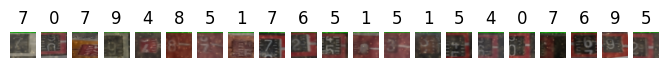

In [62]:
def show_images(images,labels):
    plt.figure(figsize=(12, 6))
    for i in range(images.size(0)):
        plt.subplot(1, 30, i + 1)
        img = np.transpose(images[i].numpy(), (1, 2, 0))
        plt.imshow(img)
        plt.title(f'{labels[i]}')
        plt.axis('off')
    plt.show()

# Display the batch of images
show_images(data_noise,predict(data_noise)) 
